# 경사 하강법(Gradient Descent)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Machine( ) 정의

* numpy Package

In [2]:
import numpy as np

* def Machine( )

In [3]:
def Machine(x, w, b):
    y_hat = (w * x) + b
    return y_hat

* x, w, b 객체 지정

In [4]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

* Machine( ) 테스트

In [5]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

# II. Gradient( ) 정의


편미분 과정 함수화 
 - 편미분을 하는 이유 : 다른 변수들을 고정한 상황에서 특정 변수가 변할때 𝑦에 미치는 영향을 알아보기 위함 <br><br>
 

     1. 𝑴𝑺𝑬 (논의 편의상 𝑴𝑺𝑬 에서 평균(mean) 절차 제외) 
        𝑦 = (𝑦- 𝑦 ℎ𝑎𝑡)² →  𝑦 = (𝑦- (𝑤𝑥 + 𝑏))²  → 𝑦 = (𝑦- 𝑤𝑥 - 𝑏)²

     2. error(𝞡) 오차함수 계산 
        (𝒚 - 𝒚 𝒉𝒂𝒕)² = (𝒚 - 𝒘𝒙 - 𝒃)² 

     3. 오차함수를 𝒘에 대해 편미분 
        𝟃 error(𝒘,𝒃) / 𝟃 𝒘 = (𝒚 - 𝒘𝒙 - 𝒃)² = 2(𝒚 - 𝒘𝒙 - 𝒃) #겉미분 * (-𝒙) #속미분
        
        * 속미분 : 해당 항 외에 모든 항을 상수화, 상수는 미분하면 0이 된다. <br>
            즉, 𝒚 - 𝒘𝒙 - 𝒃에서  상수인 𝒚,𝒃는 0 이되고, <br>
            남은 - 𝒘𝒙 을 미분해주면 (𝒘가 1차항이니까 1이 내려오고 𝒘⁰ = 1이되어 나머지 상수는  -1 * 1 * 𝒙  즉, ) -𝒙가 남는다. <br>
            산출된 속미분값과 겉미분 값을 곱해주면 편미분 값이 산출됨 <br>
            이를 오차함수에 곱해준다.<br><br>
        = (𝒚 - 𝒚 𝒉𝒂𝒕) * (-2𝒙) <br>
         <br>
     4. 오차함수를 상수항 𝒃에 대해 편미분
        𝟃 error(𝒘,𝒃) / 𝟃 𝒃 = (𝒚 - 𝒘𝒙 - 𝒃)² = 2(𝒚 - 𝒘𝒙 - 𝒃) #겉미분 * (-1) #속미분 <br>
        = (𝒚 - 𝒚 𝒉𝒂𝒕) * (-2) <br>



 - tensorflow 또는 pytorch는 위와 같은 미분의 과정을 자동화한 파이썬 라이브러리이며, 딥러닝에 사용된다. 

* def Gradient( )

In [6]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)

    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))

    return dw, db

* Gradient( ) 테스트

In [7]:
y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x, y, w, b)

In [8]:
print('dw is ', dw)
print('db is ', db)

dw is  66.0
db is  10.0


# III. Learning( ) 정의
* def Learning( )

In [9]:
def Learning(x, y, w, b, step):
    dw, db = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db
    
    return uw, ub

* Learning( ) 테스트

In [10]:
step = 0.05

uw, ub = Learning(x, y, w, b, step)

In [11]:
print('Updated_w is ', '%.3f' % uw)
print('Updated_b is ', '%.3f' % ub)

Updated_w is  -1.300
Updated_b is  0.500


# IV. testData.csv에 적용

* pandas & matplotlib Packages

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

* Read testData.csv

In [13]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

* testData.csv Information

In [14]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [15]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


* testData.csv Visualization
 - Distribution

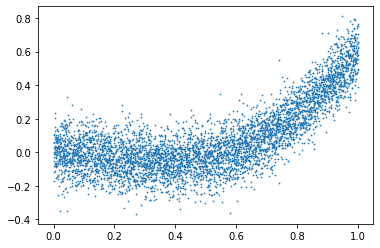

In [16]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

* 1500번 학습 실행

In [17]:
w = 2
b = 3
step = 0.05 

In [18]:
for i in range(0, 1500):
    uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
    w = uw
    b = ub

In [19]:
print('Learned_w is ', '%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


* 학습결과 회귀선 그리기

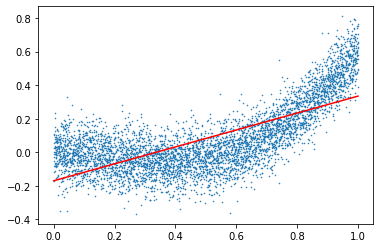

In [20]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

# V. Loss(MSE) Visualization

* Gradient( )에 MSE 추가

In [21]:
def Gradient(x, y, w, b):
    y_hat = Machine(x, w, b)
    
    dw = np.mean((y - y_hat) * (-2 * x))
    db = np.mean((y - y_hat) * (-2))
    MSE = np.mean((y - y_hat)**2)

    return dw, db, MSE

* Learning( )에 MSE 추가

In [22]:
def Learning(x, y, w, b, step):
    dw, db, MSE = Gradient(x, y, w, b)
    
    uw = w - step * dw
    ub = b - step * db

    return uw, ub, MSE

* 1500번 학습 실행

In [23]:
w = 2
b = 3
step = 0.001
mse = []

In [24]:
for i in range(0, 1500):
    uw, ub, MSE = Learning(DATA.inputs, DATA.outputs, w, b, step)

    w = uw
    b = ub
    mse.append(MSE)

* Loss(MSE) 감소 확인

In [25]:
mse[0:10]

[15.595575679087718,
 15.51649361545252,
 15.43781315527885,
 15.359532259084672,
 15.281648897745166,
 15.204161052440112,
 15.127066714601563,
 15.050363885861781,
 14.974050578001444,
 14.8981248128981]

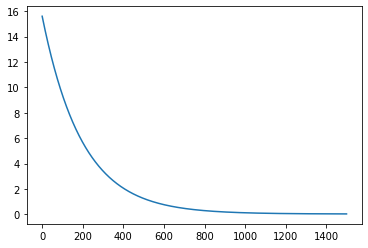

In [26]:
plt.plot(mse)
plt.show()

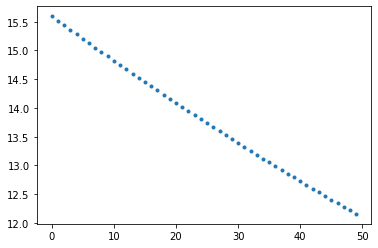

In [27]:
plt.plot(mse[0:50], '.')
plt.show()

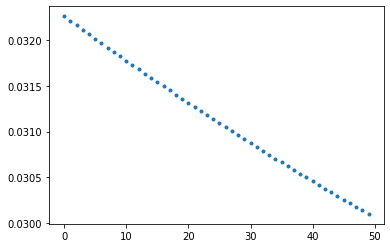

In [28]:
plt.plot(mse[1450:1500], '.')
plt.show()

# 
# 
# 
# The End
# 
# 
# 